In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [21]:
data1 = {"X"  : [2,2,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,6,6,6,6,6,6,6,6,8,8,8,8,8,8,8,9,9,9,9,9,9,9,10,10,10,10,10,10,10,11,11,11,11,11,11,11,12,12,12,12],
               "Y"  : [2,3,1,2,3,4,5,6,8,1,2,3,4,5,6,8,9,1,2,3,4,5,6,8,1,2,3,4,5,6,7,8,5,6,7,8,9,10,11,5,6,7,8,9,10,11,5,6,7,8,9,10,11,5,6,7,8,9,10,11,5,7,9,11],
    }
data2 = { "X" : [1,1,1,1,2,2,2,2,3,3,3,3,4,4,4,4,6,6,6,6,6,6,6,7,7,7,7,7,7,7,8,8,8,8,8,8,8,9,9,9,9,9,9,9,10,10,10,10,10,10,10,11,11,11,11,11,11,11,12,12,12,12,12,12,12],         
        "Y" : [1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,6,7,8,9,10,11,12,6,7,8,9,10,11,12,6,7,8,9,10,11,12,6,7,8,9,10,11,12,6,7,8,9,10,11,12,6,7,8,9,10,11,12,6,7,8,9,10,11,12]
        
       }


data = data1


In [22]:
df = pd.DataFrame(data)
cases = np.array(df)


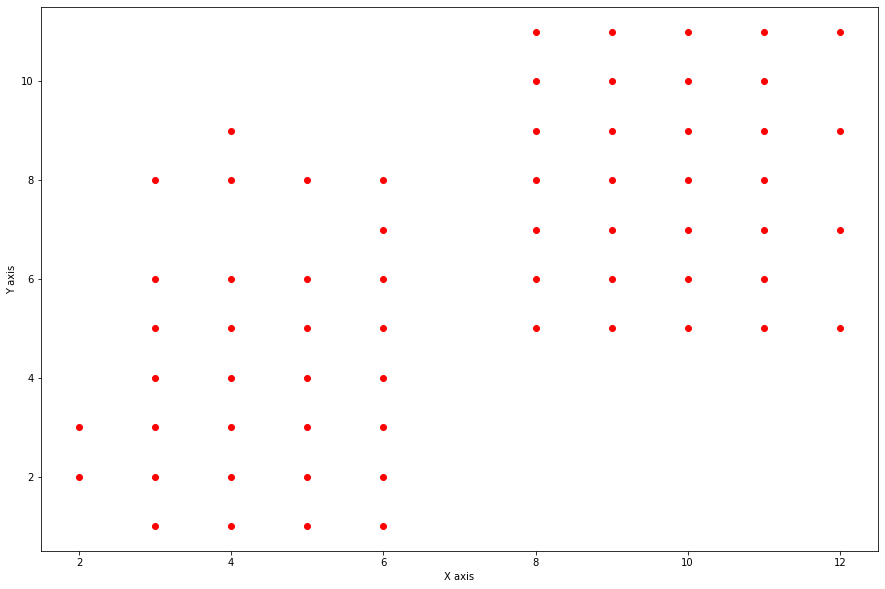

In [23]:
plt.figure(figsize = (15, 10))
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.scatter(df["X"], df["Y"], color = "red")

plt.show()

In [24]:
centroids = { 1 : [2, 2],
             2 : [10, 12],
            
              }

In [25]:
def move_centroid(counters, n_centroids, centroids, len_of_centroid, dim_of_centroid):
    
    for i in range(len_of_centroid):
        for k in range(dim_of_centroid):
            centroids[i + 1][k] = counters[i + 1][k] / n_centroids[i]
        
    return centroids 
            

In [26]:
def assigh_centroid(centroids, cases, dim_of_centroid, len_of_centroid):
    
    counters = {x + 1 : [0] * dim_of_centroid for x in range(len_of_centroid)}
    n_centroids = [0] * len_of_centroid
    
    li = [0] * dim_of_centroid
    for li in cases:
        Distance = []
        for x in centroids:
            
            Distance.append(math.dist(centroids[x], li))
            
        minn = Distance.index(min(Distance))
        
        n_centroids[minn] = n_centroids[minn] + 1
        
      
        
        for x in range(dim_of_centroid):
            counters[minn +1][x]  = counters[minn + 1][x] + li[x]
            
            
        
    Centroid = move_centroid(counters, n_centroids, centroids, len_of_centroid, dim_of_centroid)
    
    return Centroid
   

In [27]:

def Run(centroids, cases):
    
    dim_of_centroid = len(centroids[1])
    len_of_centroid = len(centroids)
    
    try:
        for k in range(10):
            CENTROIDS = assigh_centroid(centroids, cases, dim_of_centroid, len_of_centroid)
    except ZeroDivisionError:
        print("Given centroids are suitable :(")
    except TypeError:
        print("Didn't Entered the valid centroids")
        
   
    return CENTROIDS


In [28]:
cen = Run(centroids, cases)
print(cen)

{1: [4.32258064516129, 4.161290322580645], 2: [9.696969696969697, 8.0]}
